# Run Keller's results for 400m, 1500m and 10km runs

In [2]:
font = {'size'   : 16}
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rc('font', **font)
import matplotlib.ticker as ticker

import os
import glob
import pandas as pd
from turn_csv_to_fig import *

In [3]:
df_400 = run_kellers_result_new(400, time_step=0.001)
print("Hi")
df_1500 = run_kellers_result_new(1500, time_step=0.001)
print("Hi")
df_10k = run_kellers_result_new(10000, time_step=0.001)
print("Hi")

v(t1): 9.403008121738445 == 9.41156309671518?
e(t2): -0.827994837501592
v0: 9.41156309671518
vf: 9.41156309671518
Hi
v(t1): 6.824767318681569 == 6.858103199716653?
e(t2): -29.28669452779104
v0: 6.858103199716653
vf: 6.858103199716653
Hi
v(t1): 6.18814401502268 == 6.195475344539648?
e(t2): 13.383151210402502
v0: 6.195475344539648
vf: 6.195475344539648
Hi


c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


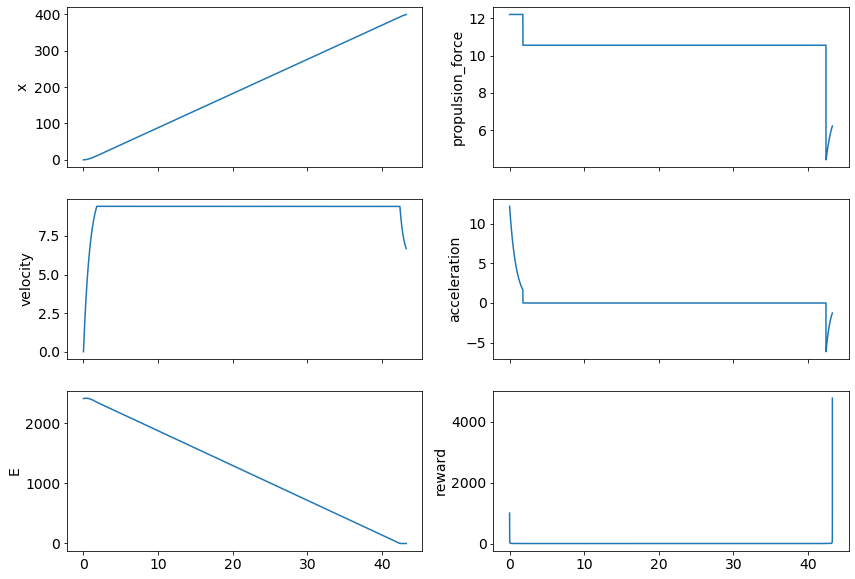

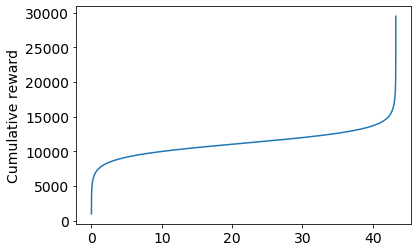

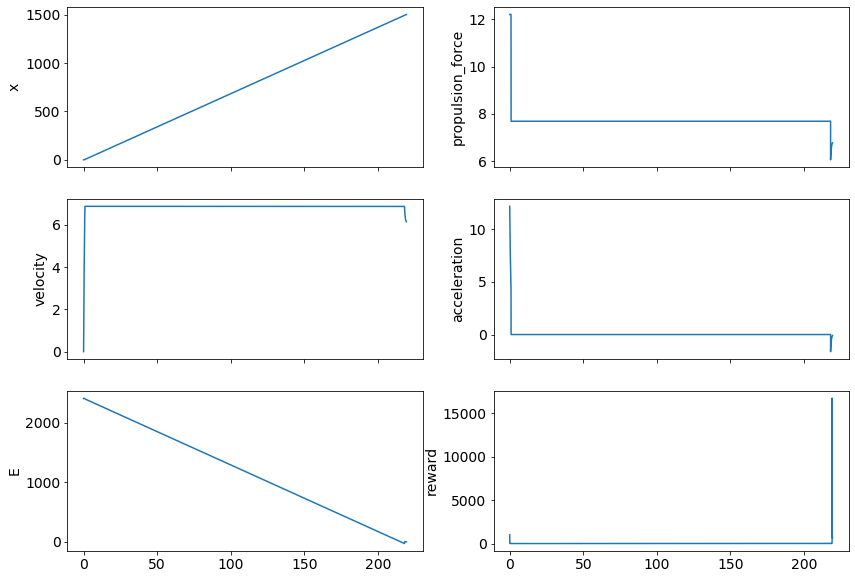

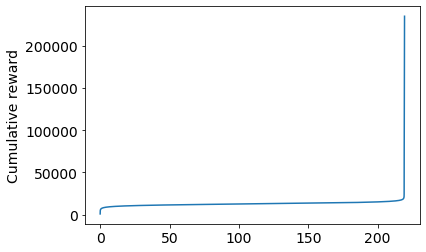

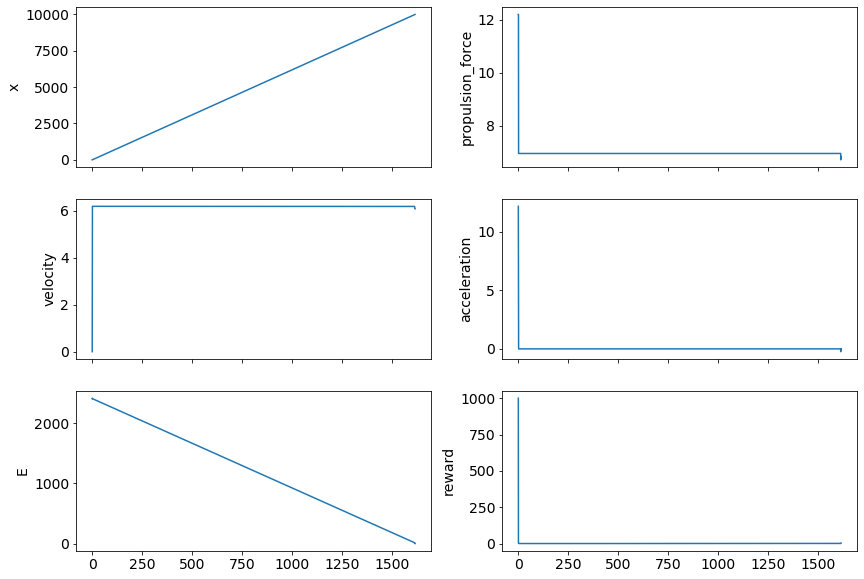

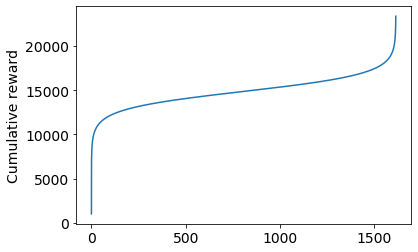

In [3]:
for i, df in enumerate([df_400, df_1500, df_10k]):
    df.to_csv(f"Kellers-{i}.csv")
    keys = [["x", "velocity", "E"], 
            ["propulsion_force", "acceleration", "reward"]]
    fig, mtp_axs = plt.subplots(nrows=3, ncols=2, figsize=(14,10), sharex=True)
    for j in range(len(keys)):
        for i,k in enumerate(keys[j]):
            mtp_axs[i][j].plot(df["time"], df[k])    
            mtp_axs[i][j].set(ylabel=k)

    plt.show()

    plt.plot(df["time"], df['reward'].cumsum())
    plt.ylabel('Cumulative reward')
    plt.show()

In [ ]:
df = df_400
df['calc_E'] = 2405.841309 + (9.93 * 4.184*df['time'])-(df['velocity']*df['velocity'])/2-(1/(0.892))*(df['velocity']*df['velocity']).cumsum()
df['E_error'] = df['calc_E'] - df['E']
df.tail()
# ??

In [ ]:
df_400.tail()

In [ ]:
df_1500.tail()

In [ ]:
df_10k.tail()

# Plot cumulative reward function

In [ ]:
fig, mtp_axs = plt.subplots(nrows=2, ncols=1, figsize=(6,6), tight_layout=True)
ftime = 1614.2
df = df_10k
mtp_axs[0].plot(df["time"][1000:], df['reward'][1000:])
mtp_axs[0].set(ylabel='Instantaneous reward')
mtp_axs[0].axvline(x=ftime, color="green", linewidth=0.75, label="xx")
mtp_axs[0].set_xlim((-40, ftime+100))
mtp_axs[0].grid(True)


mtp_axs[1].plot(df["time"][1000:], df['reward'][1000:].cumsum())
mtp_axs[1].set(ylabel='Cumulative reward (R)')
mtp_axs[1].axvline(x=ftime, color="green", linewidth=0.75, label="xx")
mtp_axs[1].set_xlim((-40, ftime+100))
mtp_axs[1].grid(True)

mtp_axs[1].set(xlabel='Time (sec)')
fig.align_labels()

plt.savefig('paper-results-reward-function-10k.pdf')  
plt.show()

In [ ]:
fig, mtp_axs = plt.subplots(nrows=2, ncols=1, figsize=(6,6), tight_layout=True)
ftime = 43.3
df = df_400
begin_cut = 10
mtp_axs[0].plot(df["time"][begin_cut:], df['reward'][begin_cut:])
mtp_axs[0].set(ylabel='Instantaneous reward')
mtp_axs[0].axvline(x=ftime, color="limegreen", linewidth=0.75, label="xx")
# mtp_axs[0].set_xlim((-40, ftime+100))
mtp_axs[0].grid(True)


mtp_axs[1].plot(df["time"][begin_cut:], df['reward'][begin_cut:].cumsum())
mtp_axs[1].set(ylabel='Cumulative reward (R)')
mtp_axs[1].axvline(x=ftime, color="limegreen", linewidth=0.75, label="xx")
# mtp_axs[1].set_xlim((-40, ftime+100))
mtp_axs[1].grid(True)

mtp_axs[1].set(xlabel='Time (sec)')
fig.align_labels()

plt.savefig('paper-results-reward-function-400.pdf')  
plt.show()

In [ ]:


fig, ax1 = plt.subplots()

ftime = 43.4
df = run_kellers_result(400, time_step=0.01)
begin_cut = 10

color = 'b'
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Instantaneous reward', color=color)
ax1.plot(df["time"][begin_cut:], df['reward'][begin_cut:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'r'
ax2.set_ylabel('Cumulative reward', color=color)  # we already handled the x-label with ax1
ax2.plot(df["time"][begin_cut:], df['reward'][begin_cut:].cumsum(), color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axvline(x=ftime, color="g", linewidth=1, label="-")


fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.align_labels()
plt.savefig('paper-results-reward-function-400.pdf')  
plt.show()

In [ ]:
plt.plot(df_400["x"], df_400['reward'].cumsum())
plt.show()
plt.plot(df_1500["x"], df_1500['reward'].cumsum())
plt.show()
plt.plot(df_10k["x"], df_10k['reward'].cumsum())
plt.ylabel('Cumulative reward')
plt.show()


# Plot training history

exp-70.0-paper-L400-muOffset1-rwd-log-Xbarrier-derivative-dt0.1-batchsize5k-1x32-lr0.001-60k-1mu-minus0.5logstd\exp-70.0-paper-L400-muOffset1-rwd-log-Xbarrier-derivative-dt0.1-batchsize5k-1x32-lr0.001-60k-1mu-minus0.5logstd_s0\progress.txt
{'AverageEpRet': 'Avg Traj. Return\n', 'EpLen': 'Avg Traj. Length \n (sec)', 'AverageVVals': 'Avg Value Function\n'}
3
AverageEpRet
EpLen
AverageVVals


c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


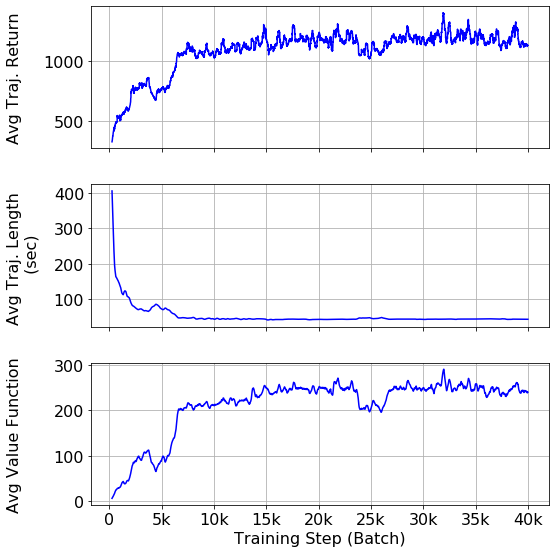

In [2]:
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib as mpl


exp_num = "70.0"
exp_dir = "exp-{}*".format(exp_num)
csv_file = os.path.join(exp_dir, exp_dir+"_s0", "progress.txt")
csv_file = glob.glob(csv_file)[0]
print(csv_file)

df = pd.read_csv(csv_file, sep="\t")
df = df[:40000]

df = df.clip(upper=(df.mean()*10), axis=1)

keys = {"AverageEpRet": "Avg Traj. Return\n", "EpLen": "Avg Traj. Length \n (sec)", "AverageVVals": "Avg Value Function\n"} # df.columns
print(keys)

fig, mtp_axs = plt.subplots(len(keys), figsize=(8,8), sharex=True)
print(len(mtp_axs))
for j, k in enumerate(keys):
    print(k)
    # mtp_axs[j].plot(df["Epoch"], df[k])
    #mtp_axs[j].plot(df["Epoch"], df[k].rolling(5).mean())
    mtp_axs[j].plot(df["Epoch"], df[k].rolling(250).mean(), color="b")
    mtp_axs[j].set(ylabel=keys[k])
    mtp_axs[j].grid(True)
    if j == 1:
        ticks_y = ticker.FuncFormatter(lambda x, pos: 0 if x ==0 else '{0:g}'.format(x/10))
        mtp_axs[j].yaxis.set_major_formatter(ticks_y)
    
ticks_x = ticker.FuncFormatter(lambda x, pos: 0 if x ==0 else '{0:g}k'.format(x/1000))
mtp_axs[j].xaxis.set_major_formatter(ticks_x)
mtp_axs[j].set(xlabel="Training Step (Batch)")

fig.align_labels()
fig.tight_layout()
plt.savefig("paper-results-train-progress-{}.pdf".format(exp_num))


In [9]:
df[9000:].head()

,Epoch,AverageEpRet,StdEpRet,MaxEpRet,MinEpRet,EpLen,AverageVVals,StdVVals,MaxVVals,MinVVals,TotalEnvInteracts,LossPi,LossV,DeltaLossPi,DeltaLossV,Entropy,KL,Time
9000,9000,882.54694,369.249330,1070.4066,52.444664,404.00000,214.31435,0.000015,214.31433,214.31433,45005000,-0.025567,52550.340,0.0,-8162.678352,0.773603,3.461747e-10,18962.983542
9001,9001,1038.73680,14.969876,1073.5292,1027.413800,457.90000,213.46785,0.000000,213.46785,213.46785,45010000,-0.003100,51250.027,0.0,-8162.678352,0.772984,3.461747e-10,18965.084245
9002,9002,918.64404,397.486660,1433.7427,57.470000,414.91666,212.72545,0.000031,212.72542,212.72542,45015000,-0.013393,59390.855,0.0,-8162.678352,0.772487,-4.619360e-09,18967.185077
9003,9003,722.73150,504.597230,1419.5070,42.805954,347.57144,212.36183,0.000015,212.36185,212.36185,45020000,-0.005946,57136.754,0.0,-8162.678352,0.771908,-9.214878e-09,18969.285158
9004,9004,1067.10360,60.498820,1228.9323,1024.929200,458.30000,211.06395,0.000000,211.06395,211.06395,45025000,-0.003100,54646.875,0.0,-8162.678352,0.771327,-5.006194e-08,18971.386744


# Plot velocity profile against Keller's

['exp-70.0-paper-L400-muOffset1-rwd-log-Xbarrier-derivative-dt0.1-batchsize5k-1x32-lr0.001-60k-1mu-minus0.5logstd\\model22600.pt\\csv\\log_1.csv']


c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


['exp-71.2puh-paper-L1500-muOffset1-rwd-log-Xbarrier-derivative-dt1-batchsize10k-1x32-lr0.01-60k-1mu-minus0.5logstd\\model14430.pt\\csv\\log_1.csv']


c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


['exp-80.2mah-paper-L10000-muOffset1-rwd-log-Xbarrier-derivative-dt1-batchsize5k-1x32-lr0.01-60k-1mu-minus0.5logstd\\model11500.pt\\csv\\log_1.csv']


c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\sajad20h\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


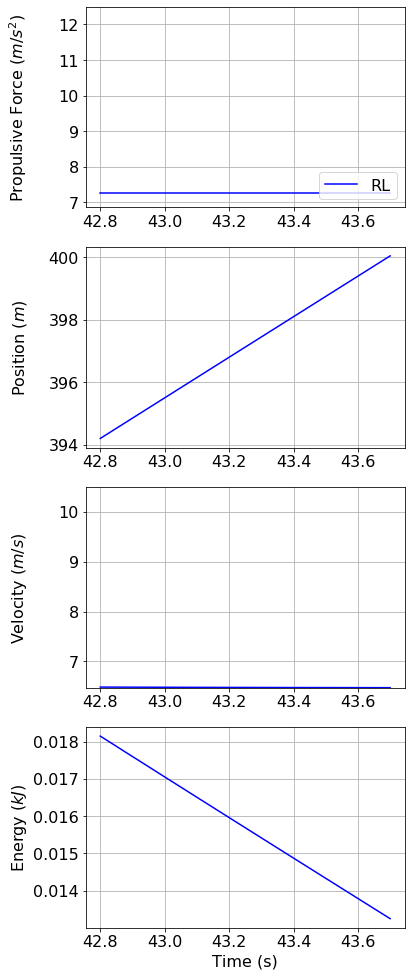

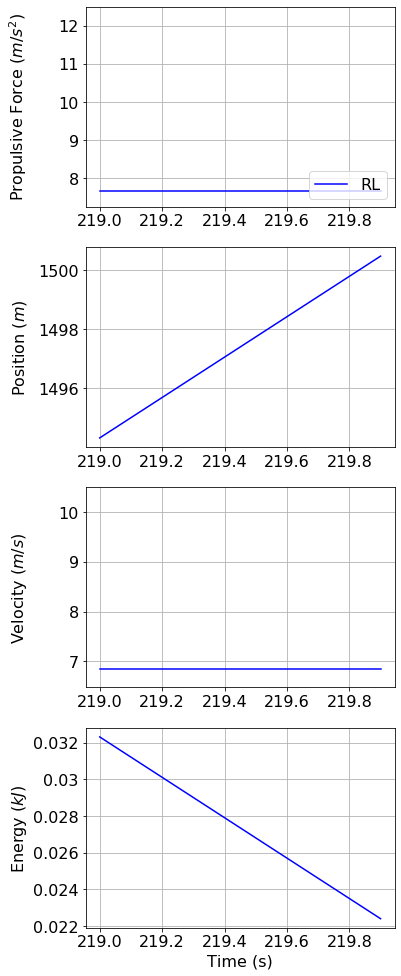

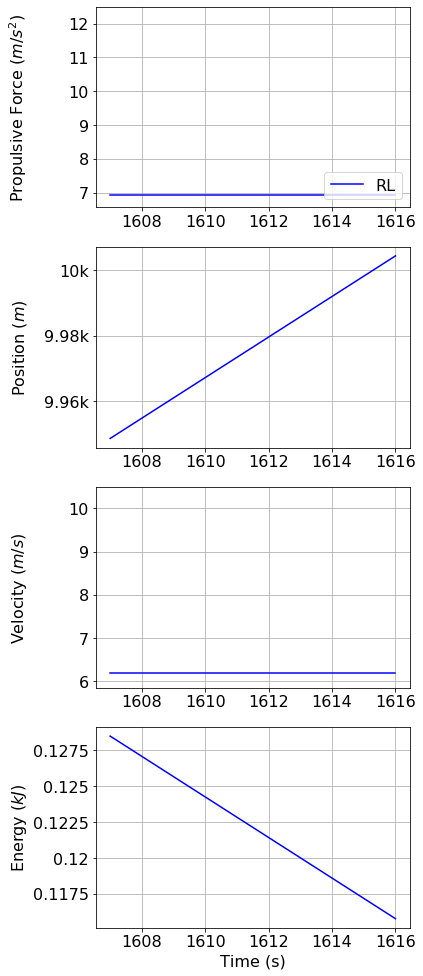

In [11]:

exp_log_nums = {
    "400": ["70.0", "22600", df_400],
    "1500": ["71.2", "14430", df_1500],
    "10000": ["80.2", "11500", df_10k],
} 


for i,d in enumerate(exp_log_nums):
    exp_num = exp_log_nums[d][0]
    log_file_num = exp_log_nums[d][1]
    keller = exp_log_nums[d][2]
    
    # create directory .../pyt_save/run_models_dirs/model22600.pt/ 
    exp_dir = "exp-{}*".format(exp_num)
    csv_file = os.path.join(exp_dir, "model{}.pt".format(log_file_num), "csv", "log_*.csv")
    
    csv_file = glob.glob(csv_file)
    print(csv_file)
    csv_file = csv_file[0]
    df = pd.read_csv(csv_file)
    df = df.tail(10)
    keys = {
            "propulsion_force": "Propulsive Force ($m/s^2$)", 
            "x": "Position ($m$)",
            "velocity": "Velocity ($m/s$)",
            "E": "Energy ($kJ$)",
    }
    fig, mtp_axs = plt.subplots(nrows=4, ncols=1, figsize=(6,14))
    for j,k in enumerate(keys):
        mtp_axs[j].plot(df["time"], df[k], color='b', label="RL")    
        # mtp_axs[j].plot(keller["time"], keller[k], linestyle='dashed', color='r', linewidth=1.2, label="Keller")
        if k == "E":
            ticks_y = ticker.FuncFormatter(lambda x, pos: 0 if x ==0 else '{0:g}'.format(x/1000))
            mtp_axs[j].yaxis.set_major_formatter(ticks_y)
        if k == "x" and d == "10000":
            ticks_y = ticker.FuncFormatter(lambda x, pos: 0 if x ==0 else '{0:g}k'.format(x/1000))
            mtp_axs[j].yaxis.set_major_formatter(ticks_y)
            
        if k == "propulsion_force":
            mtp_axs[j].set_ylim(top=12.5)
        
        if k == "velocity":
            mtp_axs[j].set_ylim(top=10.5)
        mtp_axs[j].set(ylabel=keys[k])
        mtp_axs[j].grid(True)
    mtp_axs[j].set(xlabel="Time (s)")
#         if i == 0:
#             mtp_axs[i][j].set_title(keys[k])
#     ax = mtp_axs[i][0]
#     ax.annotate(d + "m", xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
#                 xycoords=ax.yaxis.label, textcoords='offset points',
#                 size='large', ha='right', va='center')
    
    mtp_axs[0].legend(loc="lower right")
    fig.align_labels()
    fig.tight_layout()
    plt.savefig("paper-results-profile-{}.pdf".format(d))

In [104]:
records = {
    "world": [44.5, 213.1, 1659.4],
    "keller": [43.27, 219.44, 1614.1],
    "rl": [43.9, 219.9, 1616.0]
}
print("rl error")
for i in range(3):
    print()

SyntaxError: invalid syntax (<ipython-input-104-15c3dbbe5622>, line 3)

In [14]:
wr = np.array([44.5, 213.1, 1659.4])
kel = np.array([43.27, 219.44, 1614.1])
rl = np.array([43.9, 219.9, 1616.0])

kel_wr = (kel - wr)/wr *100
rl_wr = (rl - wr)/wr *100
rl_kel = (rl - kel)/kel*100

print(kel_wr)
print(rl_wr)

print(np.abs(kel_wr).mean())

print(np.abs(rl_wr).mean())
print(rl_kel.mean())

print(math.exp(-0.5) ** 2)


[-2.76404494  2.97512905 -2.72990237]
[-1.34831461  3.19099015 -2.61540316]
2.8230254551893315
2.3849026366603545
0.5944370906493633
0.36787944117144233
